In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator as IDG
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
import os 
import pathlib
import matplotlib.pyplot

In [3]:
dt = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"
path = pathlib.Path(dt)

In [4]:
from PIL import Image
def Load_Images(impath):
    imgs = []
    label = []
    l1 = os.listdir(impath)
    l1.remove('Rice_Citation_Request.txt')
    for i in l1:
        l2 = os.listdir(impath + '/' + i)
        for j in l2[:1000]:
            c = 0
            img = Image.open(impath + i + '/' + j)
            img = img.resize(size = (28,28))
            img = img.convert('L')
            #img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img).flatten())
            label.append(i)
            del img
    return np.array(imgs),label

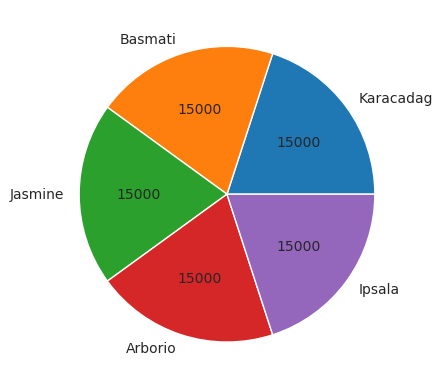

In [5]:
def plot_rice(vs):
    def all_rice(arc):
        tt = sum(vs)
        val = int(round(arc*tt/100.0))
        return '{v:d}'.format(v=val)
    return all_rice

folders = [folder for folder in os.listdir(dt) if os.path.isdir(os.path.join(dt,folder))]
counts = [len(os.listdir(os.path.join(dt, folder)))for folder in folders]

fig = matplotlib.pyplot.pie(counts, labels = folders,autopct=plot_rice(counts))

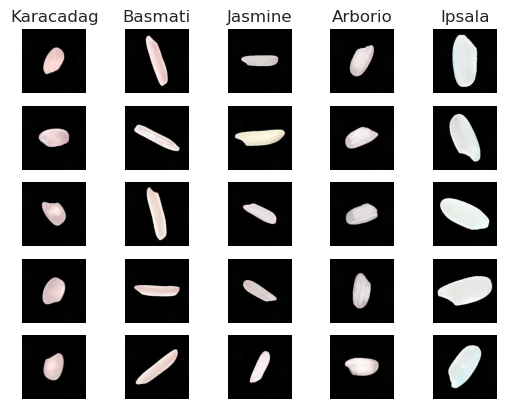

In [6]:
image_disp = []
cnt = 5
for folder in folders:
    image_disp.append([])
    for file_name in os.listdir(os.path.join(dt,folder))[:5]:
        image_disp[-1].append(cv2.imread(os.path.join(dt,folder,file_name)))
        
fig, ax = matplotlib.pyplot.subplots(cnt, len(folders))


for cl in range(len(folders)):
    ax[0, cl].set_title(folders[cl])
    for rw in range(cnt):    
        ax[cl,rw].imshow(image_disp[rw][cl])
        ax[cl,rw].axis('off')
        

In [7]:
#CNN

In [58]:
val_split = 0.25
r_scale = 1./255
t_sz = (100,100)
t_gen=IDG(rescale=r_scale,validation_split=val_split)
train_data=t_gen.flow_from_directory(dt,target_size=t_sz,batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data=t_gen.flow_from_directory(dt,target_size=t_sz,batch_size=1,shuffle=False,subset='validation')

Found 56250 images belonging to 5 classes.
Found 18750 images belonging to 5 classes.


In [59]:
train_data.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [60]:
from keras import Sequential
import tensorflow as tf
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [61]:
# parameters
f=32 #filters
ks =(3,3) #kernel size
size=(100,100,3)# input size

model=Sequential()
model.add(Conv2D(filters=f,kernel_size=ks,padding='valid',
                 activation='relu',input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(42,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense_28 (Dense)            (None, 42)                3226986   
                                                                 
 dense_29 (Dense)            (None, 16)                688       
                                                                 
 dense_30 (Dense)            (None, 5)                 85        
                                                      

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_data,epochs=10,validation_data=test_data,callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3))

Epoch 1/10
 564/1758 [========>.....................] - ETA: 5:36 - loss: 0.2099 - accuracy: 0.9340

In [ ]:
list_ls= history.history['loss']
list_vl = history.history['val_loss']
plt.plot(list_ls)
plt.plot(list_vl )
plt.show()

In [ ]:
list_acc= history.history['accuracy']
list_vl = history.history['val_accuracy']
plt.plot(list_acc)
plt.plot(list_vl )
plt.show()

In [ ]:
steps= np.math.ceil(test_data.samples / test_data.batch_size)
preds = model.predict(test_data, steps=steps)
prd_keys = np.argmax(preds, axis=1)

In [ ]:
tr_data = test_data.classes
labels = list(test_data.class_indices.keys()) 
report = classification_report(tr_data, prd_keys, target_names=labels)
print(report)

In [ ]:
cm_rice = confusion_matrix(tr_data, prd_keys)
sns.heatmap(cm_rice, annot=True, fmt="d")

In [ ]:
from PIL import Image

In [14]:
import numpy as np
def load_imgs(impath):
    imgs=[]
    label=[]
    l1=os.listdir(impath)
    l1.remove('Rice_Citation_Request.txt')
    for i in l1:
        l2=os.listdir(impath+'/'+i)
        for j in l2[:1000]:
            c=0
            img=Image.open(impath+i+'/'+j)
            img=img.resize(size=(28,28))
            img=img.convert('L')
            #img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img).flatten())
            label.append(i)
            del img
        
        '''if(c%1000==0):
            plt.imshow(img)
            plt.show()
            c=c+1'''
    return np.array(imgs),label

In [15]:
x,y=load_imgs('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/')
x.shape,len(y)

((5000, 784), 5000)

In [16]:
target=pd.Series(y,dtype='category')
target

0       Karacadag
1       Karacadag
2       Karacadag
3       Karacadag
4       Karacadag
          ...    
4995       Ipsala
4996       Ipsala
4997       Ipsala
4998       Ipsala
4999       Ipsala
Length: 5000, dtype: category
Categories (5, object): ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [17]:
t=target.cat.codes
t

0       4
1       4
2       4
3       4
4       4
       ..
4995    2
4996    2
4997    2
4998    2
4999    2
Length: 5000, dtype: int8

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,t,test_size=0.2,shuffle=True)


In [49]:

model_ANN = Sequential()
model_ANN.add(Dense(56, activation = 'relu',input_dim=X_train.shape[1]))
model_ANN.add(Dense(72, activation = 'relu'))
model_ANN.add(Dense(56, activation = 'relu'))
model_ANN.add(Dense(5, activation = 'softmax'))
model_ANN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 56)                43960     
                                                                 
 dense_25 (Dense)            (None, 72)                4104      
                                                                 
 dense_26 (Dense)            (None, 56)                4088      
                                                                 
 dense_27 (Dense)            (None, 5)                 285       
                                                                 
Total params: 52,437
Trainable params: 52,437
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_ANN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [51]:
ANN_history =model_ANN.fit(X_train, y_train,epochs=20,validation_data=[X_test,y_test],callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=4))

Epoch 1/20
125/125 [==============================] - 2s 5ms/step - loss: 2.7218 - accuracy: 0.7713 - val_loss: 0.7036 - val_accuracy: 0.8860
Epoch 2/20
125/125 [==============================] - 1s 4ms/step - loss: 0.4919 - accuracy: 0.9053 - val_loss: 0.5133 - val_accuracy: 0.8990
Epoch 3/20
125/125 [==============================] - 1s 4ms/step - loss: 0.3986 - accuracy: 0.9137 - val_loss: 0.4120 - val_accuracy: 0.9150
Epoch 4/20
125/125 [==============================] - 1s 4ms/step - loss: 0.3386 - accuracy: 0.9183 - val_loss: 0.4944 - val_accuracy: 0.9220
Epoch 5/20
125/125 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.9158 - val_loss: 0.4937 - val_accuracy: 0.9230
Epoch 6/20
125/125 [==============================] - 1s 4ms/step - loss: 0.2711 - accuracy: 0.9333 - val_loss: 0.2561 - val_accuracy: 0.9400
Epoch 7/20
125/125 [==============================] - 0s 4ms/step - loss: 0.2204 - accuracy: 0.9400 - val_loss: 0.2727 - val_accuracy: 0.9340
Epoch 

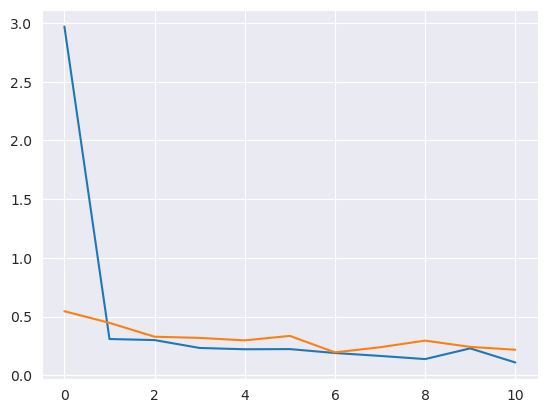

In [34]:
list_ls=ANN_history.history['loss']
list_vl = ANN_history.history['val_loss']
plt.plot(list_ls)
plt.plot(list_vl )
plt.show()

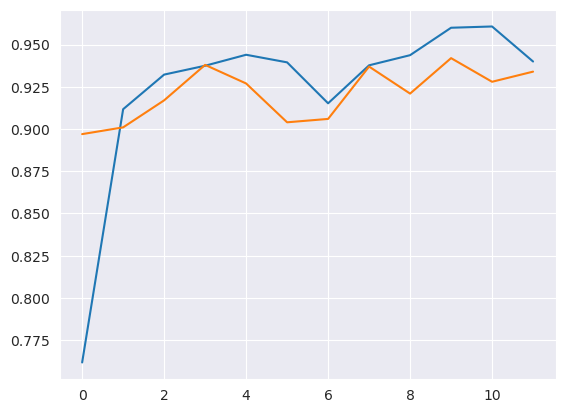

In [38]:
list_acc= ANN_history.history['accuracy']
list_vl = ANN_history.history['val_accuracy']
plt.plot(list_acc)
plt.plot(list_vl )
plt.show()

In [54]:
y_pred = model_ANN.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

32/32 [==============================] - 0s 2ms/step


In [56]:

print('MLP:')
print(classification_report(y_test, y_pred))

MLP:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       192
           1       0.93      0.93      0.93       193
           2       0.99      1.00      0.99       217
           3       0.92      0.93      0.93       210
           4       0.98      0.93      0.95       188

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [52]:
y_test.shape

(1000,)

In [53]:
y_test

3822    0
4803    2
3380    0
1769    1
3094    0
       ..
4894    2
4691    2
1434    1
4545    2
4689    2
Length: 1000, dtype: int8

<AxesSubplot:>

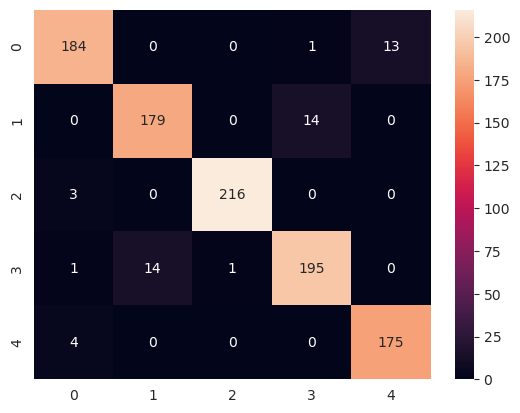

In [57]:
cm_mlp = confusion_matrix(y_pred, y_test)
sns.heatmap(cm_mlp, annot=True, fmt="d")